<a href="https://colab.research.google.com/github/artyomsol23/google_colab/blob/main/my_homework_3_week%5Breu_ml_school%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**ML School by REU Data Scinece Club**</center>

---
## <center> Неделя №3 </center>




На этой неделе вам предстоит обработать данные о зарплатах. Данные очень похожи на настоящие, поэтому вам будет в каких-то моментах неприятно) В них очень много мусора и поэтому понадобиться потратить время на обработку. DS - специалист работает с чем-то подобным крайне часто.
Если столкнетесь с проблемой, пишите в чат, где вам помогут авторы и остальные участники, решать проблемы в коллективе - легче. Удачи!

Про данные можно прочитать [тут](https://oscarbaruffa.com/messy/)

Импортируем библиотеки которые могут вам понадобиться, а затем загрузим данные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Теперь давайте скачаем нужные данные


In [2]:
!git clone https://github.com/MeinRespect/REU-Ml-SCHOOL.git

Cloning into 'REU-Ml-SCHOOL'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 14.94 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
df = pd.read_csv('/content/REU-Ml-SCHOOL/right_data.csv')
df.sample(5)

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
8031,4/27/2021 15:30:44,35-44,Computing or Tech,Application Support Engineer,I do some customer tech support and some softw...,"155,000",2000.0,USD,NaN,NaN,US,Wisconsin,Verona,11 - 20 years,11 - 20 years,Master's degree,Woman,White
14544,4/28/2021 14:57:00,25-34,Education (Higher Education),Library Associate,academic library staff at a university,"34,000",NaN,USD,NaN,NaN,US,Arizona,Tucson,5-7 years,2 - 4 years,College degree,Woman,White
8300,4/27/2021 15:52:09,35-44,Household Services,Nanny,NaN,"62,400",NaN,USD,NaN,NaN,United States,Washington,Seattle,11 - 20 years,8 - 10 years,Master's degree,NaN,White
16119,4/28/2021 17:32:39,35-44,Insurance,COO,Co-founder,"200,000",250000.0,USD,NaN,NaN,United States,Connecticut,Hartford,21 - 30 years,21 - 30 years,Master's degree,Man,White
1525,4/27/2021 11:27:01,25-34,"Accounting, Banking & Finance",Senior Business Analyst,NaN,"70,000",10000.0,CAD,NaN,NaN,Canada,NaN,Toronto,8 - 10 years,8 - 10 years,College degree,Woman,White


Как можно заметить названия колонок оставляют желать лучшего, давайте это исправим

In [4]:
df.columns = ['Timestamp', 'Age','Industry', 'Job', 'Job context', 'Salary',
              'Amount of monetary compensation', 'Currency',
              'Currency special', 'Income context', 'Country',
              'State in USA', 'City', 'Work expirince all',
              'Work expirince in current field', 'Education', 'Gender', 'Race'
              ]
df.sample(40)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
9925,4/27/2021 19:24:11,45-54,Health care,Corporate Manager,NaN,"130,000",13000.0,USD,NaN,NaN,United States,Massachusetts,Boston,21 - 30 years,21 - 30 years,Master's degree,Woman,White
16646,4/28/2021 18:18:28,35-44,Computing or Tech,Customer Service Quality Manager,NaN,"115,000",7000.0,USD,NaN,NaN,USA,North Carolina,Asheville,11 - 20 years,8 - 10 years,College degree,Woman,White
13749,4/28/2021 13:35:54,25-34,Engineering or Manufacturing,Customer Service Representative,NaN,"43,000",NaN,USD,NaN,NaN,United States,Illinois,Northlake,11 - 20 years,11 - 20 years,College degree,Woman,"Hispanic, Latino, or Spanish origin"
23988,5/3/2021 20:26:12,35-44,Health care,Director of Operations,NaN,123000,10000.0,USD,NaN,NaN,United States,Louisiana,New Orleans,11 - 20 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,White
8010,4/27/2021 15:28:43,35-44,Government and Public Administration,Graphic designer,NaN,"51,000",NaN,USD,NaN,NaN,US,Colorado,Fort Collins,21 - 30 years,5-7 years,Some college,Woman,White
2441,4/27/2021 11:44:14,35-44,Computing or Tech,"Manager, Learning & Media",I manage a team of one instructional designer ...,"90,000",NaN,USD,NaN,NaN,United States,Illinois,Chicago,11 - 20 years,8 - 10 years,Master's degree,Woman,White
26239,5/18/2021 10:03:28,25-34,Computing or Tech,Customer Success,NaN,125000,12500.0,USD,NaN,NaN,USA,Texas,Dallas,2 - 4 years,2 - 4 years,PhD,Man,White
6584,4/27/2021 13:57:19,35-44,Education (Primary/Secondary),Substitute teacher,NaN,"26,000",0.0,USD,NaN,NaN,USA,Ohio,Dayton,11 - 20 years,5-7 years,College degree,Woman,White
10564,4/27/2021 21:25:32,35-44,individual & family services,training and quality assurance supervisor,board certified behaviour analyst working with...,"80,000",0.0,CAD,NaN,NaN,canada,NaN,toronto,11 - 20 years,11 - 20 years,Master's degree,Woman,White
13063,4/28/2021 12:04:01,25-34,"Marketing, Advertising & PR",Assistant SEO Manager,NaN,"75,000",2000.0,USD,NaN,NaN,United States,Oregon,Portland,11 - 20 years,8 - 10 years,College degree,Man,White


# **Задание 1. Чистка данных (6 баллов)**

## Этап 1.1
Теперь вам нужно привести колонки Salary и Amount of monetary compensation к единой шкале измерения - доллару.
Для этого вы можете использовать два способа:

1.   Простой. Вы берете сегодняшнюю дату и приводите все основные валюты из колонки Currency к доллару, а те строчки, где значение колонки равно "Other", вы удаляете.
2.   Сложный. Вы смотрите на значение Timestamp и актуальный для этой даты курс. Если в Currency встречается значение "Other", то вы пытаетесь восстановить валюту по колонке Currency Special. Тут вам может пригодится библиотека [forex](https://forex-python.readthedocs.io/en/latest/usage.html). Внимание! Библиотека часто не работает и выдает различные ошибки. Вы можете попробовать найти альтернативу или придмать свой интересный способ.

За оба решения вы получите **одинаковое количество баллов**, но учитывайте, что в простом вы теряете много полезной информации.

In [5]:
# Ваш код тут
df = df[(df['Salary'] != 'Other') & (df['Amount of monetary compensation'] != 'Other')]

exchange_rates = {
    'USD': 1.0,
    'BRL': 5.56265,
    'EUR': 0.853818,
    'GBP': 0.744821,
    'INR': 85.9509,
    'JPY': 148.05,
}

def convert_to_usd(value, currency):
    if pd.isna(value) or str(value).strip() == '':
        return None
    try:
        value_cleaned = float(str(value).replace(',', '').strip())
        if currency in exchange_rates:
            return value_cleaned / exchange_rates[currency]
        else:
            return value_cleaned
    except:
        return None

df['Salary'] = df.apply(lambda row: convert_to_usd(row['Salary'], row['Currency']), axis=1)
df['Amount of monetary compensation'] = df.apply(lambda row: convert_to_usd(row['Amount of monetary compensation'], row['Currency']), axis=1)
df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
25568,5/6/2021 22:05:05,25-34,Nonprofits,Member Service Manager,Project management and people management,73000.0,3500.0,USD,NaN,NaN,United States,Minnesota,Minneapolis,8 - 10 years,2 - 4 years,College degree,Woman,White
6146,4/27/2021 13:37:06,25-34,"Marketing, Advertising & PR",Marketing strategist,NaN,88800.0,10000.0,USD,NaN,NaN,United States,Colorado,Denver,5-7 years,5-7 years,College degree,Woman,White
11805,4/28/2021 5:33:34,35-44,Education (Higher Education),Lecturer,NaN,130000.0,0.0,CHF,NaN,NaN,Switzerland,NaN,Geneva,11 - 20 years,11 - 20 years,Master's degree,Woman,White
24790,5/5/2021 19:38:39,25-34,Nonprofits,Editorial Coordinator,for scientific publications w/i a university,65000.0,0.0,USD,NaN,NaN,USA,Washington,Seattle,5-7 years,5-7 years,College degree,Woman,White
22544,4/30/2021 20:58:46,55-64,funeral services,Funeral Assistant,work supervised by funeral director,30284.0,250.0,USD,NaN,NaN,USA,California,Sacramento CA,8 - 10 years,5-7 years,Master's degree,Woman,White


После стандартизации к доллару удалите эти две колонки: Currency и Currency Special


In [6]:
# Ваш код тут
df = df.drop(['Currency', 'Currency special'], axis=1)
df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
22190,4/30/2021 18:12:41,55-64,Education (Higher Education),Associate Professor,NaN,110000.0,0.0,NaN,USA,Ohio,Cincinnati,31 - 40 years,21 - 30 years,Master's degree,Woman,White
17520,4/28/2021 20:43:08,35-44,Computing or Tech,"Director, Marketing",NaN,155000.0,0.0,NaN,Canada,NaN,Vancouver,11 - 20 years,11 - 20 years,College degree,Woman,White
3200,4/27/2021 12:00:56,18-24,Retail,Cashier/Clerk,NaN,18720.0,0.0,NaN,USA,Utah,Riverdale,1 year or less,1 year or less,College degree,Woman,White
10156,4/27/2021 20:01:35,45-54,Education (Higher Education),IT Director,NaN,128000.0,NaN,NaN,USA,Pennsylvania,Philadelphia,21 - 30 years,11 - 20 years,Master's degree,Woman,White
24639,5/5/2021 17:15:01,35-44,"Leisure, Sport & Tourism",Senior Tournament Director,NaN,57500.0,1500.0,NaN,USA,Pennsylvania,Philadelphia,21 - 30 years,8 - 10 years,Master's degree,Man,White


## Этап 1.2
Приведите страны к единым названиям, например в данных не должно быть одновременно USA и United States. Различных значений много, но постарайтесь сохранить как можно больше информации. Строки с нерелевантными значениями удалите. В качестве помощи мы уже подготовили значения для замены некоторых стран. Обрабатывать все наблюдения необязательно, но постарайтесь восстановить как можно больше значений.                                   

In [7]:
usa_names = ['United States', 'US', 'USA',
       'usa', 'U.S.', 'United States ', 'us',
       'Usa', 'United States of America', 'United states', 'USA ',
       'United states ','united states', 'United States of America ',
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A',
       'U.S.A.', 'America', 'united states of america', 'Us', 'The United States',
       'United State of America', 'United Stated','u.s.', 'UNITED STATES', 'united States',
       'USA-- Virgin Islands', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ''Uniited States',
       'Worldwide (based in US but short term trips aroudn the world)',
       'United Sates of America', 'United States', 'america', 'Unted States', 'United Statesp',
       'United Stattes', 'United Statea', 'Unites States', 'United Statees',
       'UNited States', 'Uniyed states', 'Uniyes States', 'United States of Americas',
       'U.A.', 'U. S.' 'US of A', 'United States of america ',
       'U.SA', 'United Status', ' U.S.', 'Serbia', 'Canada and USA',
       'Virginia', 'U.s.', 'U.s.a.', 'USS', 'Uniteed States', 'United Stares',
       ' US', 'Unites states ', 'Us ', 'Unite States', 'The US',
       'united states ', 'United States (I work from home and my clients are all over the US/Canada/PR',
       'United states of America ', 'For the United States government, but posted overseas',
       'From Romania, but for an US based company', 'UnitedStates', 'Uniited States',
       'United States of america', 'United statew', ' United States', 'United Statues',
       'Untied States', 'United States of American ', 'USA (company is based in a US territory, I work remote)',
       'USAB', 'Unitied States', 'United Sttes', 'united stated', 'United States Of America',
       'Uniter Statez', 'U. S ', 'United states of America',
       'USA tomorrow ', 'United Stateds', 'Japan, US Gov position',
       'n/a (remote from wherever I want)',  'US govt employee overseas, country withheld', 'usa ',
       'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'UA',
       'United Stares ', 'United STates', 'USaa', 'uSA',
       'United States- Puerto Rico','California ', 'US of A',
       'uS', 'USD', "USA, but for foreign gov't", 'U. S.', 'United y',
       'United Statss', 'United states of america', 'UsA',
       'I work for a UAE-based organization, though I am personally in the US.',
       'United  States',  'United States is America',
       'United States of American', 'U.S.A ', 'United Statws']

uk_names = ['United Kingdom', 'United Kingdom ', 'Scotland ',
           'United Kingdom', 'UK ', 'England/UK',
           'UK', 'Great Britain ', 'Englang',
           'Scotland', 'UK (England)',
           'England', 'UK', 'Wales (United Kingdom)', 'England ',
           'Ireland', 'United kingdom ', 'Uk', 'united kingdom',
           'Great Britain', 'UK for U.S. company',
           'England', 'U.K. (northern England)', 'U.K',
           'Ireland', 'Wales (UK)', 'ireland'
           'Northern Ireland',  'europe', 'United Kingdom (England)',
           'United Kingdom.', 'Northern Ireland ', 'england',
           'United kingdom', 'United Kingdomk', 'UK (Northern Ireland)',
           'England, Gb', 'UK, remote', 'ENGLAND', 'England, UK.',
           'England, United Kingdom', 'U.K.', 'Scotland, UK', 'Wales', 'United Kindom',
           'Wales, UK', 'Unites kingdom',  'U.K. ',
           'Wales, UK', 'England, UK',  'Uk ',  'uk',
           'Northern Ireland, United Kingdom', 'uk',
           'UK, but for globally fully remote company']

canada_names = ['canada', 'Canada ', 'Canada, Ottawa, ontario', 'CANADA ',
               'Canadw', 'CANADA', 'Can', 'Canda', 'Canad', 'Csnada', 'Canadá', 'Canada ', 'Canad', 'Csnada']

ger_names = ['Germany ', 'germany', 'Company in Germany. I work from Pakistan.']

In [8]:
# Ваш код тут
country_mapping = {
    'USA': usa_names,
    'United Kingdom': uk_names,
    'Canada': canada_names,
    'Germany': ger_names
}

reverse_mapping = {}
for standard_name, variants in country_mapping.items():
    for variant in variants:
        reverse_mapping[variant.strip().lower()] = standard_name

def standardize_country(country):
    if pd.isna(country):
        return None

    country_str = str(country).strip().lower()
    return reverse_mapping.get(country_str)

df['Country'] = df['Country'].apply(standardize_country)
df = df.dropna(subset=['Country'])

df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
1011,4/27/2021 11:18:34,25-34,Recruitment or HR,Technical Recruiter,IT staffing,80000.0,20000.0,NaN,USA,New York,NYC,5-7 years,2 - 4 years,College degree,Woman,White
14759,4/28/2021 15:24:31,25-34,Nonprofits,Executive Director,NaN,40000.0,2000.0,NaN,USA,Illinois,Barrington,8 - 10 years,5-7 years,Master's degree,Woman,White
15690,4/28/2021 17:15:27,25-34,Business or Consulting,Associate director,Marketint,83000.0,6000.0,NaN,USA,District of Columbia,Washington,2 - 4 years,2 - 4 years,College degree,Woman,White
14699,4/28/2021 15:17:25,35-44,Government and Public Administration,Investigations Officer - anti money laundering,NaN,130000.0,4000.0,NaN,USA,District of Columbia,Washington,11 - 20 years,8 - 10 years,Master's degree,Woman,White
1243,4/27/2021 11:22:25,25-34,Computing or Tech,Conversion Optimization Specialist,NaN,98000.0,NaN,"There is also some equity, which I don't count...",USA,New York,New York,8 - 10 years,5-7 years,Master's degree,Woman,White


# **Задание 2. Замена пропущенных значений (5 баллов)**



## Этап 2.1
Найдите в данных пропущенные значения и выведите их количество для каждой колонки:

In [9]:
# Ваш код тут
print(df.isnull().sum())

Timestamp                              0
Age                                    0
Industry                              67
Job                                    0
Job context                        19777
Salary                                 0
Amount of monetary compensation     6825
Income context                     23852
Country                                0
State in USA                        3763
City                                  74
Work expirince all                     0
Work expirince in current field        0
Education                            194
Gender                              1151
Race                                 157
dtype: int64


Замените пропущенные значения во всех колонках **кроме Education**. Там где можно сделайте это с помощью моды, а в колонках по типу State in USA замените на определенное значение, в данном случае Another Country, а в Amount of monetary compensation на 0

In [10]:
# Ваш код тут
df_filled = df.copy()

for column in df_filled.columns:
    if column == 'Education':
        continue
    elif column == 'State in USA':
        df_filled[column] = df_filled[column].fillna('Another Country')
    elif column == 'Amount of monetary compensation':
        df_filled[column] = df_filled[column].fillna(0)
    else:
        mode_value = df_filled[column].mode()[0]
        df_filled[column] = df_filled[column].fillna(mode_value)

df = df_filled.copy()

df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
5541,4/27/2021 13:15:22,35-44,Academic research,Research Project Manager,job duties probably more equivalent to researc...,56500.000000,1500.0,extra is longevity pay for being at a state in...,USA,Texas,Galveston,11 - 20 years,11 - 20 years,Master's degree,Woman,White
4734,4/27/2021 12:45:23,25-34,Education (Higher Education),Venture Analyst,Fundraising,46733.376207,0.0,Hourly,United Kingdom,Another Country,Oxford,5-7 years,5-7 years,Master's degree,Woman,White
16774,4/28/2021 18:30:43,18-24,Computing or Tech,Global Product Manager,Fundraising,95000.000000,10000.0,"additional compensation is a max bonus, not gu...",USA,California,Bay Area,2 - 4 years,1 year or less,College degree,Woman,White
22779,5/1/2021 0:03:47,35-44,Engineering or Manufacturing,Demand Planning Team Leader,Fundraising,110000.000000,11000.0,Hourly,USA,Georgia,Atlanta,21 - 30 years,5-7 years,Master's degree,Woman,White
960,4/27/2021 11:17:49,35-44,Nonprofits,Controller,Fundraising,98000.000000,0.0,Hourly,USA,New York,Syracuse,11 - 20 years,11 - 20 years,Master's degree,Woman,White


## Этап 2.2
Давайте теперь попоробуем заменить пропущенные значения при помощи Sklearn. В этой библиотеке есть много классных методов для замены пропусков и они позволяют это делать более точнее. В данном случае мы возьмем самый простой - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Что нужно сделать:

1.   Импортируйте библиотеку
2.   Замените пропуски в колонке Education с помощью SimpleImputer(пример есть в документации, также лучше использовать параметр strategy=most_frequent).
3.   Преобразуйте результат из numpy.array в датафрейм и поменяйте название колонок
4.   Замените старый датасет на новый


In [11]:
# Ваш код тут
from sklearn.impute import SimpleImputer

education_col = df[['Education']].copy()
imputer = SimpleImputer(strategy='most_frequent')
imputed_education = imputer.fit_transform(education_col.values.reshape(-1, 1))
imputed_education_df = pd.DataFrame(imputed_education, columns=['Education'])

df['Education'] = imputed_education_df['Education']

df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
25608,5/7/2021 3:31:45,25-34,Veterinary care,Veterinary surgical assistant,Pack/prep technician--i specialize in sterilit...,36000.00000,500.000000,Hourly,USA,South Carolina,Charleston,5-7 years,1 year or less,Master's degree,Woman,White
26516,7/1/2021 17:48:31,35-44,Recruitment or HR,HR Consultant,Fundraising,200000.00000,0.000000,Hourly,USA,New Jersey,Parsippany,11 - 20 years,8 - 10 years,College degree,Woman,White
23661,5/3/2021 14:39:55,25-34,Computing or Tech,Business Analyst,Fundraising,42963.34287,3222.250715,Hourly,United Kingdom,Another Country,Nottingham,5-7 years,2 - 4 years,"Professional degree (MD, JD, etc.)",Woman,White
6237,4/27/2021 13:40:38,25-34,Government and Public Administration,Operations Research Analyst,OPM Series 1515,103690.00000,1500.000000,GS-13 with DC/Baltimore locality pay,USA,Maryland,Greenbelt,2 - 4 years,2 - 4 years,Master's degree,Woman,"Asian or Asian American, White"
2786,4/27/2021 11:52:04,35-44,Government and Public Administration,City Research Scientist,Qualitative and Quantitative Research and Data...,86000.00000,0.000000,Hourly,USA,New York,New York City,5-7 years,5-7 years,College degree,Woman,White


# **Задание 3. Построение графиков (5 баллов)**


Давайте начинать исследование наших данных с помошью графиков. Для начала оцените по графику violin plot как распределна зарплата и есть ли в ней выбросы. Если у вас не получается построить нормальный график, то вам нужно удалить аномально большие значения.

---

**Важно! Графики должны быть читаемыми**

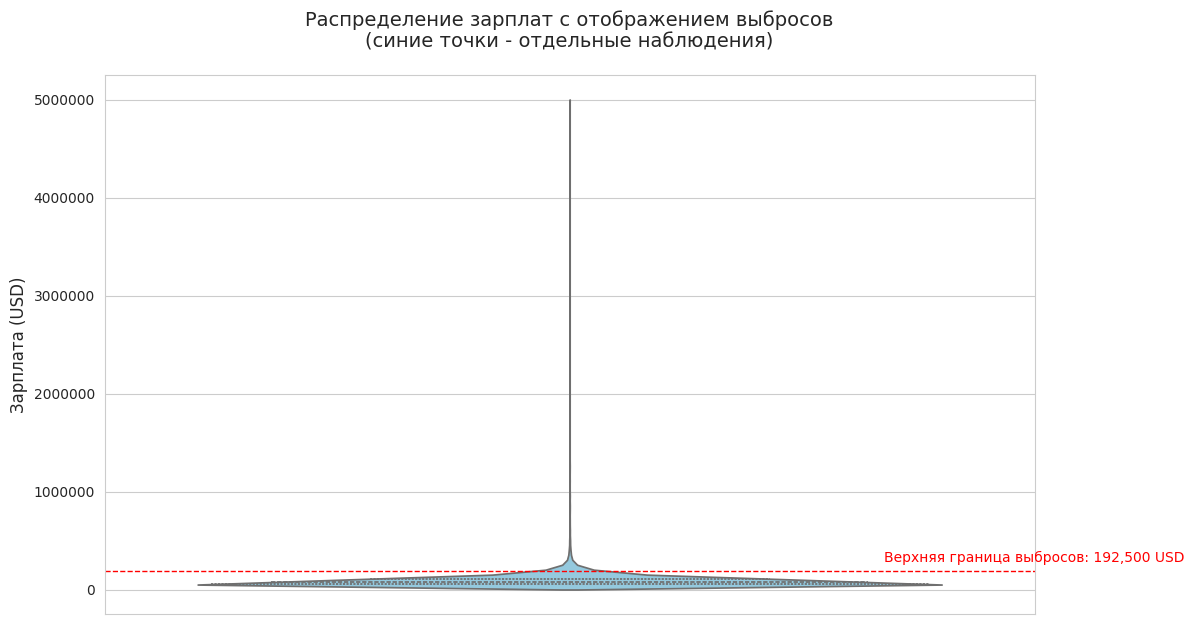

In [12]:
# Ваш код тут
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

violin = sns.violinplot(
    y='Salary',
    data=df,
    inner='quartile',
    color='skyblue',
    cut=0
)

sns.swarmplot(
    y='Salary',
    data=df,
    color='darkblue',
    alpha=0.3,
    size=3
) if len(df) < 1000 else None

plt.title(
    'Распределение зарплат с отображением выбросов\n(синие точки - отдельные наблюдения)',
    fontsize=14,
    pad=20
    )
plt.ylabel('Зарплата (USD)', fontsize=12)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.axhline(
    y=upper_bound,
    color='red',
    linestyle='--',
    linewidth=1
    )
plt.text(
    x=0.5,
    y=upper_bound*1.5,
    s=f'Верхняя граница выбросов: {upper_bound:,.0f} USD',
    ha='center',
    color='red'
    )

plt.show()

Теперь давайте ответим на несколько вопросов о наших данных с помощью графиков

**1)** У каких десяти индустрий самые высокие средние зарплаты? (Для этого лучше всего подойдет barplot)

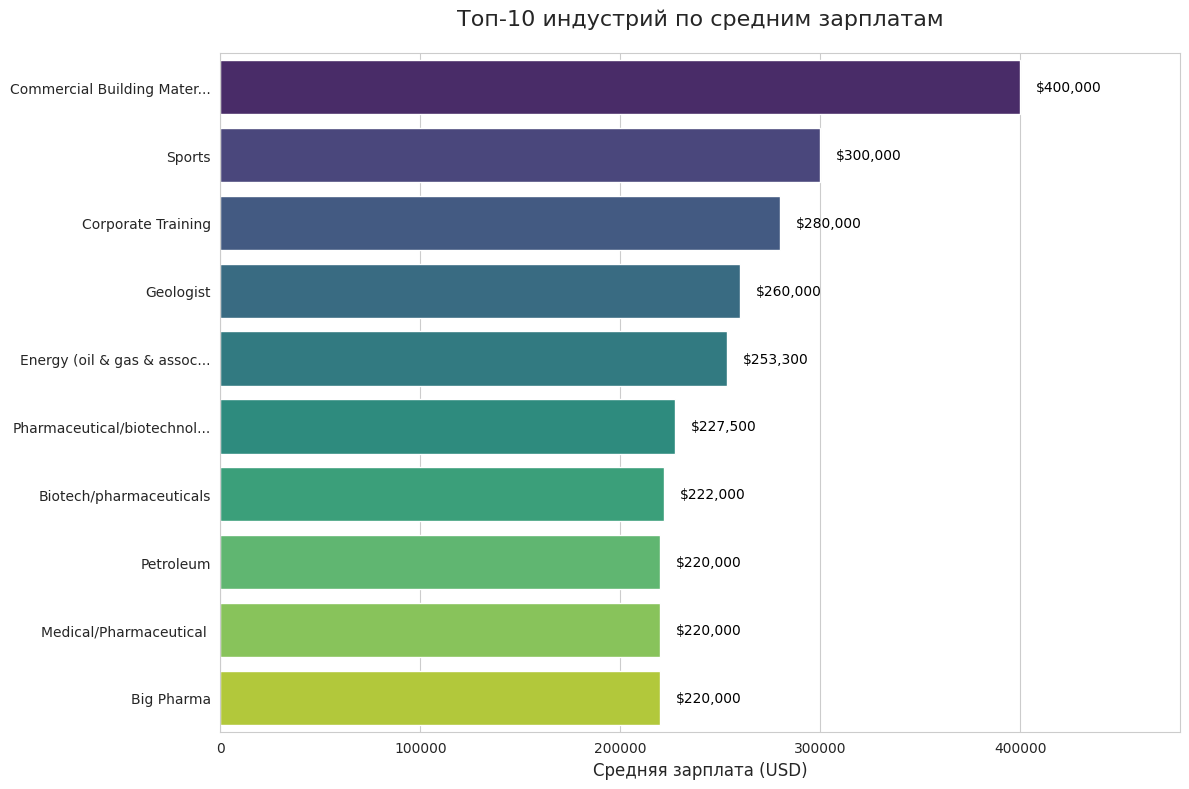

In [13]:
# Ваш код тут
industry_salary = (df.groupby('Industry')['Salary']
                   .mean()
                   .sort_values(ascending=False))

top_10_industries = industry_salary.head(10).reset_index()

plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=top_10_industries,
    x='Salary',
    y='Industry',
    hue='Industry',
    palette="viridis",
    legend=False,
    dodge=False
)

for i, (industry, salary) in enumerate(zip(top_10_industries['Industry'], top_10_industries['Salary'])):
    formatted_salary = f"${salary:,.0f}"

    barplot.text(
        salary + 0.02 * top_10_industries['Salary'].max(),
        i,
        formatted_salary,
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

plt.title("Топ-10 индустрий по средним зарплатам", fontsize=16, pad=20)
plt.xlabel("Средняя зарплата (USD)", fontsize=12)
plt.ylabel('')
plt.xlim(0, top_10_industries['Salary'].max() * 1.2)
plt.yticks(
    ticks=np.arange(len(top_10_industries)),
    labels=[label[:25] + '...' if len(label) > 25 else label for label in top_10_industries['Industry']],
    fontsize=10
)

plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

**2)** Влияет ли опыт работы на среднюю зарплату? (Для этого лучше всего подойдет barplot)

/tmp/ipython-input-14-2238513788.py:10: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  bar = sns.barplot(


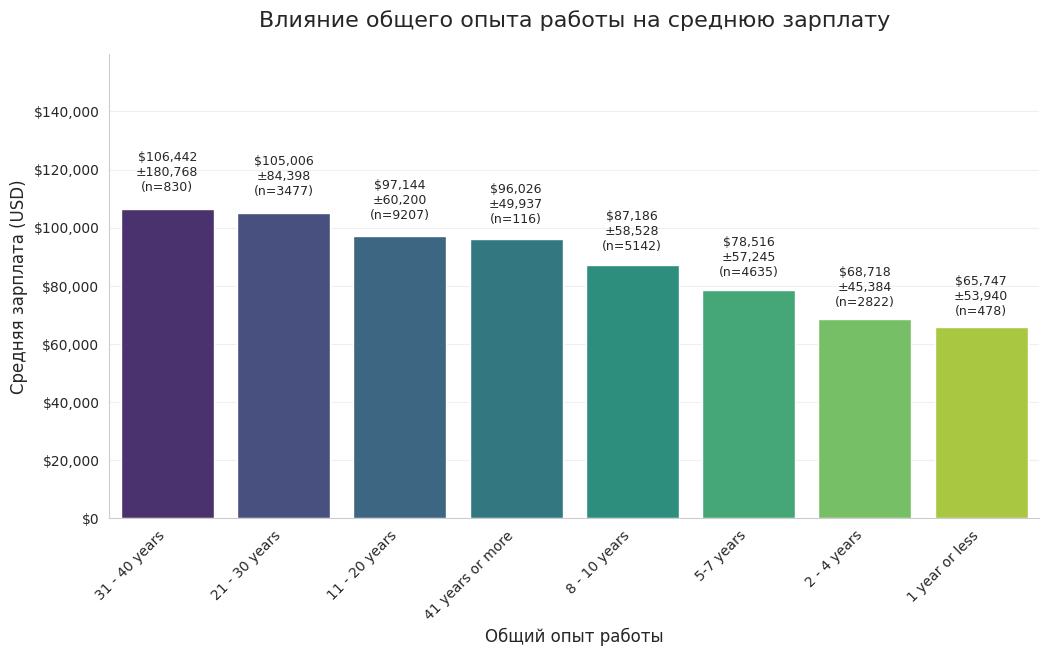

In [14]:
# Ваш код тут
exp_salary = (df.groupby('Work expirince all')['Salary']
              .agg(['mean', 'std', 'count'])
              .sort_values('mean', ascending=False)
              .reset_index())

plt.figure(figsize=(12, 8))
plt.subplots_adjust(bottom=0.3)

bar = sns.barplot(
    data=exp_salary,
    x='Work expirince all',
    y='mean',
    hue='Work expirince all',
    palette='viridis',
    dodge=False,
    legend=False,
    errwidth=1,
    capsize=0.2
)

for i, (_, row) in enumerate(exp_salary.iterrows()):
    plt.text(
        i,
        row['mean'] * 1.05,
        f"${row['mean']:,.0f}\n±{row['std']:,.0f}\n(n={row['count']})",
        ha='center',
        va='bottom',
        fontsize=9,
        linespacing=1.2
    )

plt.title("Влияние общего опыта работы на среднюю зарплату", fontsize=16, pad=20)
plt.xlabel("Общий опыт работы", fontsize=12)
plt.ylabel("Средняя зарплата (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, exp_salary['mean'].max() * 1.5)

sns.despine()
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.show()

**3)** Выделяется ли в зарплате и премиях зависимость от образования? (Тут нужно построить scatter plot, при этом выбрать значения Amount of monetary compensation неравные 0)

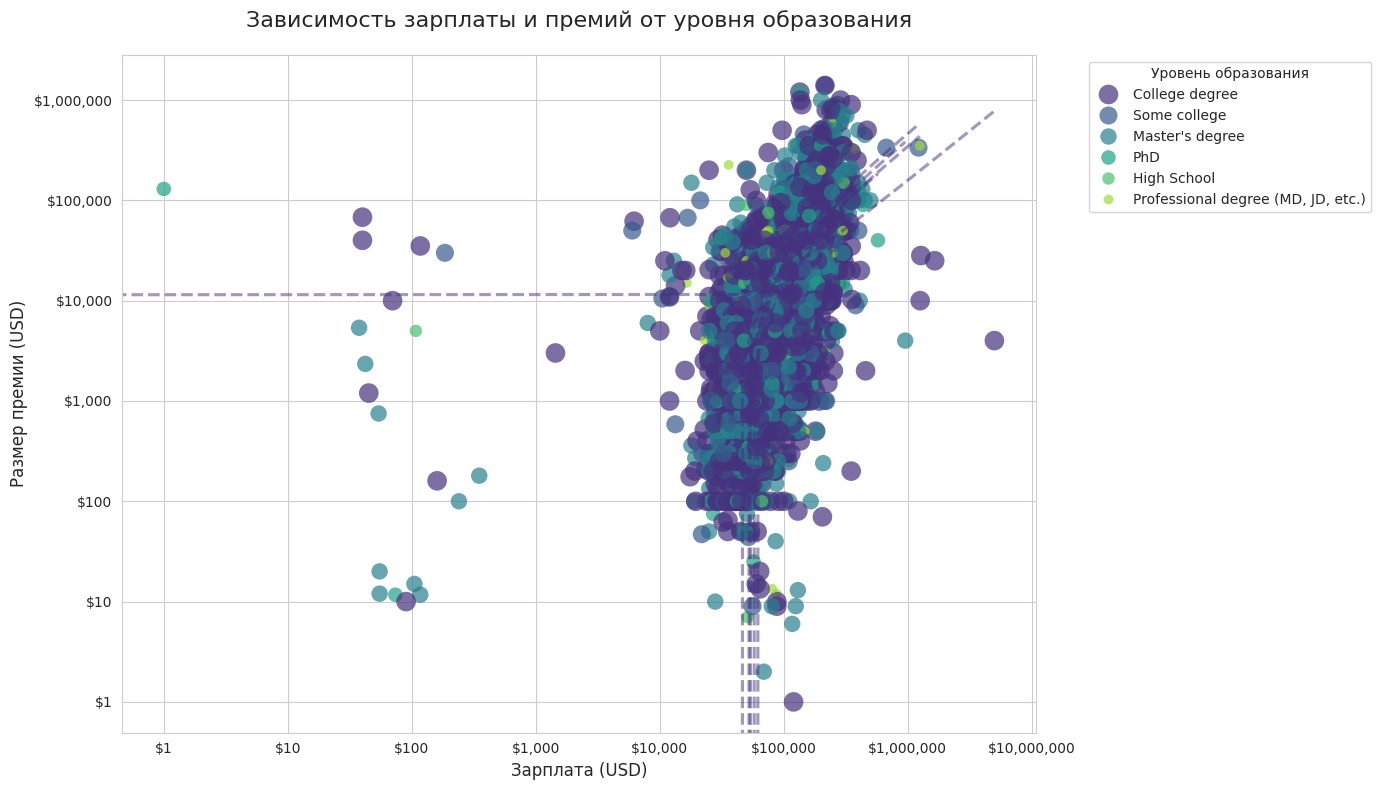

In [15]:
# Ваш код тут
df_filtered = df[df['Amount of monetary compensation'] != 0]

plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(
    data=df_filtered,
    x='Salary',
    y='Amount of monetary compensation',
    hue='Education',
    palette='viridis',
    size='Education',
    sizes=(50, 200),
    alpha=0.7,
    edgecolor='none'
)

for edu_level in df_filtered['Education'].unique():
    subset = df_filtered[df_filtered['Education'] == edu_level]
    if len(subset) > 1:
        sns.regplot(
            data=subset,
            x='Salary',
            y='Amount of monetary compensation',
            scatter=False,
            ci=None,
            line_kws={'linestyle': '--', 'alpha': 0.5},
            color=scatter.get_children()[0].get_facecolor()[0]
        )

plt.title("Зависимость зарплаты и премий от уровня образования", fontsize=16, pad=20)
plt.xlabel("Зарплата (USD)", fontsize=12)
plt.ylabel("Размер премии (USD)", fontsize=12)
plt.yscale('log')
plt.xscale('log')

handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles[:len(df_filtered['Education'].unique())],
    labels[:len(df_filtered['Education'].unique())],
    title='Уровень образования',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# **Задание 4. Создание новых признаков (4 балла)**

Давайте теперь создадим **2 новых признака**. Мы предлагаем вам три идеи, но вы вправе придумать что то свое. Главное условие, признаки не должны повторять предыдущие и быть линейно зависимыми. например нельзя просто умножить колонку Salary на два и добавить ее к датафрейму.

Идеи которые предлагаем мы:

1.   Преобразовать колонку Race и сделать ее полезной для будующей модели. Это не совсем создание нового признака, скорее преобразование старого. Все расы в ней разделены союзом or или запятой. Вы можете создать аналог дамми переменных и разделить расы на колонки. если человек указал данную расу - ставить 1.
2.   Создать новую колонку с населением города, в котором живет человек. Для этого вы можете взять данные по пути - /content/REU-Ml-SCHOOL/city_population_data.csv.
3. Добавить колонку со cредней зарплатой человека, основанной на его возрасте и опыте работы.


In [ ]:
city_population = pd.read_csv('/content/REU-Ml-SCHOOL/city_population_data.csv')

df = df.merge(city_population, on='city', how='left')

def calculate_avg_salary(age, experience):
    base_salary = 30000
    age_coef = 500
    exp_coef = 1000
    avg_salary = base_salary + (age * age_coef) + (experience * exp_coef)
    return avg_salary

df['avg_salary'] = df.apply(lambda row: calculate_avg_salary(row['Age'], row['Work expirince all']), axis=1)

df.sample(5)

На этом все, если вы качественно подготовили данные, то у вас на руках датасет, который можно использоват например для обучения модели по предсказанию зарплаты или для научной работы